In [1]:
import tensorflow as tf
import sys

from tensorflow import acosh

sys.path.append('./')
from utils import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
train_x, test_x, val_x, train_y, test_y, val_y, x_mean, x_std = load_dataset()
print(train_x.shape)
train_x = np.expand_dims(train_x,-1)
test_x = np.expand_dims(test_x,-1)
val_x = np.expand_dims(val_x,3)
print(train_x.shape)


 ******* 
./processed_data/0/0_317mfcc.npy
 ******* 
./processed_data/0/0_294mfcc.npy
 ******* 
./processed_data/0/0_0mfcc.npy
 ******* 
./processed_data/0/0_281mfcc.npy
 ******* 
./processed_data/0/0_285mfcc.npy
 ******* 
./processed_data/0/0_399mfcc.npy
 ******* 
./processed_data/0/0_289mfcc.npy
 ******* 
./processed_data/0/0_242mfcc.npy
 ******* 
./processed_data/0/0_460mfcc.npy
 ******* 
./processed_data/0/0_282mfcc.npy
 ******* 
./processed_data/0/0_291mfcc.npy
 ******* 
./processed_data/0/0_143mfcc.npy
 ******* 
./processed_data/0/0_333mfcc.npy
 ******* 
./processed_data/0/0_470mfcc.npy
 ******* 
./processed_data/0/0_427mfcc.npy
 ******* 
./processed_data/0/0_277mfcc.npy
 ******* 
./processed_data/0/0_34mfcc.npy
 ******* 
./processed_data/0/0_111mfcc.npy
 ******* 
./processed_data/0/0_442mfcc.npy
 ******* 
./processed_data/0/0_451mfcc.npy
 ******* 
./processed_data/0/0_178mfcc.npy
 ******* 
./processed_data/0/0_273mfcc.npy
 ******* 
./processed_data/0/0_267mfcc.npy
 ******* 
./pr

In [88]:
N = train_x.shape[0]
#N = 12
learning_rate=0.0001
batch_size=N 
epochs=200
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
            'models/cnn_early.keras',
            verbose=1,
            monitor='val_loss',
            save_best_only=True,
            mode='auto'
        )
early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',       # Monitor validation loss
            patience=10,              # Number of epochs with no improvement after which training will be stopped
            verbose=1,                # Verbosity level
            restore_best_weights=True # Restore the weights of the best epoch
        )

In [89]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 1)),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,278,049 (4.88 MB)

 Trainable params: 1,278,049 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=['accuracy']
        )

In [91]:
history = model.fit(
            train_x,
            train_y,
            epochs=epochs,
            batch_size=batch_size,
            verbose=1,
            validation_data=(val_x, val_y),
            callbacks=[checkpoint, early_stopping]
        )

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4975 - loss: 0.7007
Epoch 1: val_loss improved from inf to 0.68722, saving model to models/cnn_early.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4975 - loss: 0.7007 - val_accuracy: 0.7400 - val_loss: 0.6872
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.5075 - loss: 0.6946
Epoch 2: val_loss improved from 0.68722 to 0.68537, saving model to models/cnn_early.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step - accuracy: 0.5075 - loss: 0.6946 - val_accuracy: 0.6000 - val_loss: 0.6854
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.5763 - loss: 0.6884
Epoch 3: val_loss improved from 0.68537 to 0.68401, saving model to models/cnn_early.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - accuracy: 0.5763 - loss: 0.6884 - val_accuracy: 0.5100 - val_loss: 0.6840
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.5888 - loss: 0.6856
Epoch 4: val_loss improved from 0.68401 to 0.68249, 

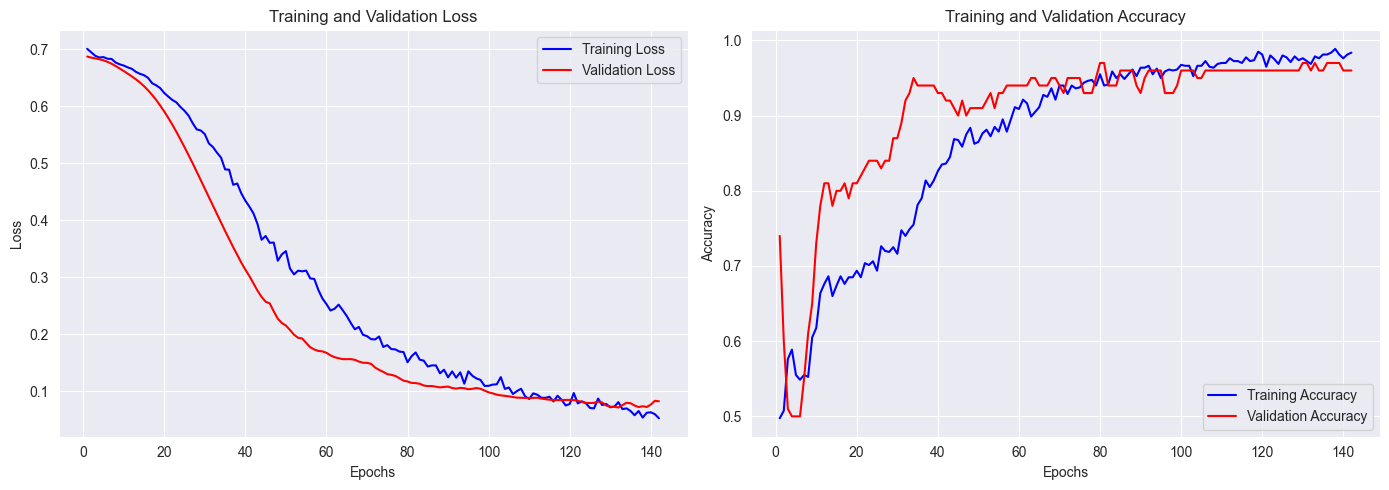

In [92]:
import matplotlib.pyplot as plt
def plot_training_progress(history):
    # Extract loss and accuracy for both training and validation sets
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plot the training and validation loss
    plt.figure(figsize=(14, 5))
    
    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage after training
plot_training_progress(history)

In [ ]:
from sklearn.model_selection import KFold

def cross_validate_model(model, data_x, data_y, folds=5):
    kfold = KFold(n_splits=folds, shuffle=True)
    fold_no = 1
    accuracies = []

    for train_index, val_index in kfold.split(data_x, data_y):
        print(f"Training on fold {fold_no}...")
        train_x, val_x = data_x[train_index], data_x[val_index]
        train_y, val_y = data_y[train_index], data_y[val_index]

        model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            metrics=['accuracy']
        )
        history = model.fit(
            train_x,
            train_y,
            epochs=epochs,
            batch_size=batch_size,
            verbose=1,
            validation_data=(val_x, val_y),
            callbacks=[checkpoint, early_stopping]
         )
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Fold {fold_no} - Validation Accuracy: {val_accuracy}")
        accuracies.append(val_accuracy)
        fold_no += 1

    print(f"Cross-validation accuracies: {accuracies}")
    print(f"Mean accuracy: {np.mean(accuracies)}, Std: {np.std(accuracies)}")


In [ ]:
def main():
    # Load dataset
    train_x, test_x, val_x, train_y, test_y, val_y, x_mean, x_std = load_dataset()
    train_x = np.expand_dims(train_x, -1)
    test_x = np.expand_dims(test_x, -1)
    val_x = np.expand_dims(val_x, -1)

    # Combine train and val sets for cross-validation
    data_x = np.concatenate((train_x, val_x), axis=0)
    data_y = np.concatenate((train_y, val_y), axis=0)

    # Initialize and cross-validate the model
    cross_validate_model(model, data_x, data_y, folds=5)

In [ ]:
main()

In [ ]:
plot_training_progress(history)

In [ ]:
plot_training_progress(history)

In [ ]:
def predictions_to_labels(predictions):
        # Convert probabilities to binary class labels
        return (predictions > 0.5).astype(int).flatten()

In [ ]:
def index_of_max(output_list):
    list_of_indicies = []
    for sub_list in output_list:
        list_of_indicies.append(np.argmax(sub_list))
    return list_of_indicies

predictions = model.predict(test_x)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print('Training accuracy: ', acc[-1])
print('Validation accuracy: ', val_acc[-1])

confusion = tf.math.confusion_matrix(
    labels=tf.constant(test_y.flatten()),
    predictions=tf.constant(index_of_max(predictions)),
    num_classes=2)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, xticklabels=['0','1'], yticklabels=['0','1'], 
            annot=True, fmt='g'),
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [19]:
print(test_x.shape)

(100, 32, 32, 1)


In [76]:
predictions = model.predict(test_x)
print((predictions > 0.5).astype(int).flatten())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print('Training accuracy: ', acc[-1])
print('Validation accuracy: ', val_acc[-1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Training accuracy:  0.9712499976158142
Validation accuracy:  0.9399999976158142


In [ ]:
def plot_confusion_matrix(test_y, predictions):
        # Convert predictions to class labels
        predicted_labels = predictions_to_labels(predictions)
        # Generate confusion matrix
        confusion = tf.math.confusion_matrix(
            labels=test_y.flatten(),
            predictions=predicted_labels,
            num_classes=2
        )
        plt.figure(figsize=(6, 5))
        sns.heatmap(confusion, xticklabels=['0', '1'], yticklabels=['0', '1'],
                    annot=True, fmt='g')
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.show()

In [ ]:
plot_confusion_matrix(test_y, predictions)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(train_x.reshape(800, 32 * 32))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=train_y)
plt.show()

In [99]:
from preprocessing import MFCCProcessor
import scipy.io.wavfile as wav

AUDIO_FILE = 'C:/Users/tosic/Arduino_projects/sensor_com/snoring_detection/Snoring_Dataset_@16000/dataset_16/1/1_90.wav'  # Replace with the actual path to your audio file
MODEL_PATH = 'C:/Users/tosic/Arduino_projects/sensor_com/snoring_detection/models/cnn_early.keras'  # Replace with the path to your trained model

# Load the trained model
model_loaded = tf.keras.models.load_model(MODEL_PATH)

# Initialize the MFCCProcessor with dummy directories, as we use only its method directly
processor = MFCCProcessor(directory='', save_directory='', save_img=False)

In [100]:
fs, audio = wav.read(AUDIO_FILE)
if audio.ndim != 1:
    audio = audio[:, 0]  # Ensure mono channel

In [110]:
mfcc = processor.apply_mfcc(fs, audio)  # Use MFCCProcessor's method for extraction
#mfcc = np.expand_dims(mfcc, axis=(0, -1))  # Add batch and channel dimensions for prediction
print(mfcc.shape)
x_mean = np.mean(mfcc, axis=1)
x_std = np.std(mfcc, axis=1)
mfcc = (mfcc - x_mean) / x_std

print(x_mean.shape, x_std.shape)
mfcc = np.expand_dims(mfcc, axis=(0,3))
print(mfcc.shape)


(32, 32)
(32,) (32,)
(1, 32, 32, 1)


In [111]:
prediction = model_loaded.predict(mfcc)
print(f"Prediction probability: {(prediction > 0.5).astype(int).flatten()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction probability: [1]


In [112]:
mfcc = processor.apply_mfcc(fs, audio)  # Use MFCCProcessor's method for extraction
mfcc = np.expand_dims(mfcc, axis=(0, -1))  # Add batch and channel dimensions for prediction

print(mfcc.shape)
x_mean = np.mean(mfcc)
x_std = np.std(mfcc)
mfcc = (mfcc - x_mean) / x_std

print(x_mean.shape, x_std.shape)
# Predict snoring probability
prediction = model.predict(mfcc)[0][0]
print(f"Prediction probability: {prediction}")

(1, 32, 32, 1)
() ()
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction probability: 0.9582378268241882


In [ ]:
print(mfcc)

In [ ]:
mfcc = processor.apply_mfcc(fs, audio)  # Use MFCCProcessor's method for extraction
mfcc = np.expand_dims(mfcc, axis=0)  # Add batch and channel dimensions for prediction
mfcc.shape